In [2]:
import sys

sys.path.append('..')

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from input_pipeline import ase_atoms_to_jraph_graph, generate_fragments
from qm9 import load_qm9

In [3]:
def draw_graph(
    positions: jnp.ndarray,
    senders: jnp.ndarray,
    receivers: jnp.ndarray,
    node_color: jnp.ndarray = None,
    edge_color: jnp.ndarray = None,
    title: str = None,
):
    positions -= positions.mean(axis=0)

    # if len(positions) > 1:
    #     cov = np.cov(positions.T)
    #     _, v = jnp.linalg.eigh(cov)
    #     positions = positions @ v

    if edge_color is None:
        edge_color = jnp.zeros_like(senders)
    if node_color is None:
        node_color = jnp.zeros_like(positions[:, 0])

    edge_color = edge_color.astype(jnp.float32)

    plt.scatter(
        positions[:, 1], positions[:, 2], c=node_color, zorder=2, s=100, vmin=0, vmax=1
    )
    plt.axis("equal")
    for s, r, c in zip(senders, receivers, edge_color):
        c = plt.cm.tab10(c)
        plt.plot(positions[[s, r], 1], positions[[s, r], 2], zorder=1, color=c)

    if title is not None:
        plt.title(title)

In [4]:
atoms = load_qm9("qm9_data")[1]
graph = ase_atoms_to_jraph_graph(atoms, nn_cutoff=5.0, atomic_numbers=jnp.array([1, 6, 7, 8, 9]))

frag = next(generate_fragments(jax.random.PRNGKey(0), graph, 5, 0.125))

In [20]:
with open("inputs.txt", "w") as f:
    for seed in range(8):
        n = 2976
        for i in range(0, len(load_qm9("qm9_data")), n):
            path = f"qm9_seed{seed}_from{i:06d}_to{i + n:06d}"
            print(seed, i, i + n, path)
            f.write(f"{path} {seed} {i} {i + n}\n")

0 0 2976 qm9_seed0_from000000_to002976
0 2976 5952 qm9_seed0_from002976_to005952
0 5952 8928 qm9_seed0_from005952_to008928
0 8928 11904 qm9_seed0_from008928_to011904
0 11904 14880 qm9_seed0_from011904_to014880
0 14880 17856 qm9_seed0_from014880_to017856
0 17856 20832 qm9_seed0_from017856_to020832
0 20832 23808 qm9_seed0_from020832_to023808
0 23808 26784 qm9_seed0_from023808_to026784
0 26784 29760 qm9_seed0_from026784_to029760
0 29760 32736 qm9_seed0_from029760_to032736
0 32736 35712 qm9_seed0_from032736_to035712
0 35712 38688 qm9_seed0_from035712_to038688
0 38688 41664 qm9_seed0_from038688_to041664
0 41664 44640 qm9_seed0_from041664_to044640
0 44640 47616 qm9_seed0_from044640_to047616
0 47616 50592 qm9_seed0_from047616_to050592
0 50592 53568 qm9_seed0_from050592_to053568
0 53568 56544 qm9_seed0_from053568_to056544
0 56544 59520 qm9_seed0_from056544_to059520
0 59520 62496 qm9_seed0_from059520_to062496
0 62496 65472 qm9_seed0_from062496_to065472
0 65472 68448 qm9_seed0_from065472_to06844

In [13]:
len(load_qm9("qm9_data"))

133885

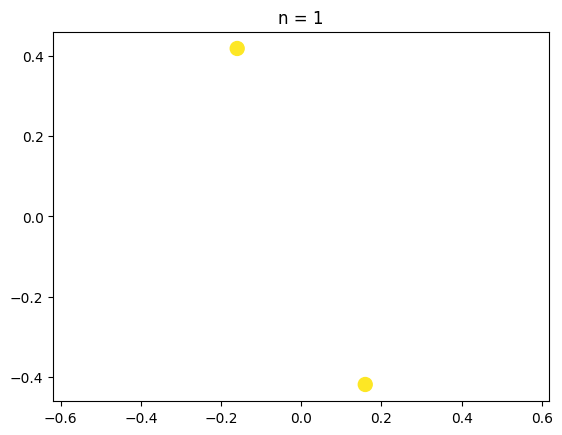

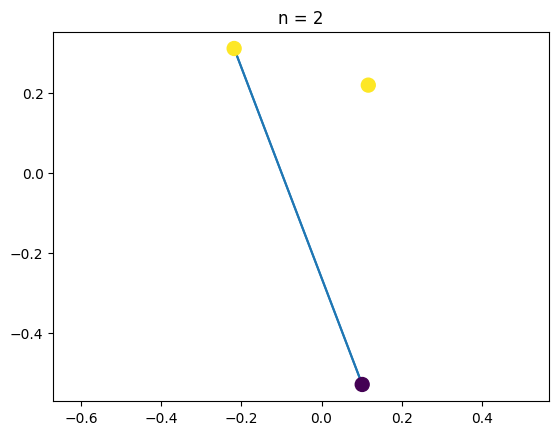

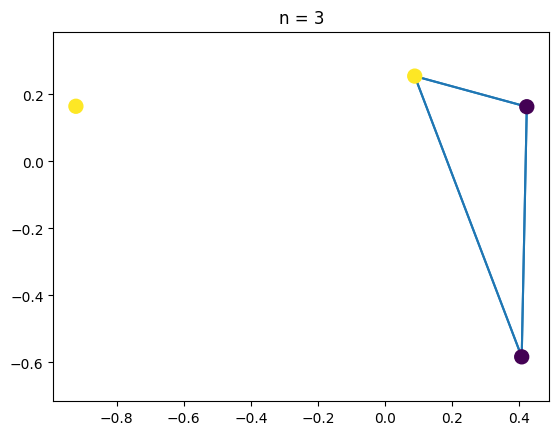

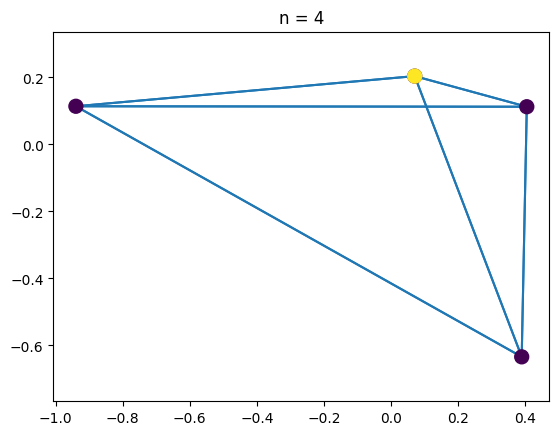

In [3]:


for graph in generative_sequence(
    jax.random.PRNGKey(2), graph, jnp.array([1, 6, 7, 8, 9]), epsilon=0.5
):
    plt.figure()
    n = len(graph.nodes.positions)
    draw_graph(
        jnp.concatenate(
            [
                graph.nodes.positions,
                graph.nodes.positions[0] + graph.globals.target_position,
            ]
        ),
        graph.senders,
        graph.receivers,
        # node_color=jnp.array([0] + [1] * (n - 1) + [2]),
        node_color=jnp.concatenate([graph.nodes.focus_probability, jnp.array([1.0])]),
        title=f"n = {n}",
    )


In [4]:
qm9 = load_qm9("qm9_data")

In [5]:
import collections

collections.Counter([frozenset(x.get_atomic_numbers()) for x in qm9])

Counter({frozenset({1, 6}): 4907,
         frozenset({1, 7}): 1,
         frozenset({1, 8}): 1,
         frozenset({1, 6, 7}): 14198,
         frozenset({1, 6, 8}): 45770,
         frozenset({1, 6, 7, 8}): 66814,
         frozenset({6, 7}): 4,
         frozenset({7, 8}): 1,
         frozenset({6, 9}): 2,
         frozenset({6, 7, 8}): 26,
         frozenset({1, 6, 9}): 96,
         frozenset({6, 7, 9}): 3,
         frozenset({1, 6, 8, 9}): 250,
         frozenset({1, 6, 7, 9}): 736,
         frozenset({1, 6, 7, 8, 9}): 1062,
         frozenset({6, 7, 8, 9}): 14})

In [6]:
import tqdm

In [7]:
small_qm9 = [x for x in qm9 if set(x.get_atomic_numbers()) == {1, 6}]
len(small_qm9)

collections.Counter([len(x) for x in small_qm9])

Counter({5: 1,
         4: 1,
         8: 2,
         7: 1,
         11: 5,
         9: 3,
         14: 24,
         6: 1,
         10: 3,
         12: 9,
         17: 170,
         13: 14,
         15: 38,
         16: 67,
         20: 289,
         18: 190,
         19: 512,
         23: 1247,
         21: 1103,
         26: 18,
         24: 73,
         22: 221,
         25: 695,
         27: 185,
         29: 35})

In [8]:
%load_ext line_profiler


In [9]:
graph = ase_atoms_to_jraph_graph(small_qm9[10], cutoff=5.0)
len(graph.nodes.positions)

14

In [11]:
%lprun -f _make_middle_sample list(generative_sequence(jax.random.PRNGKey(2), graph, jnp.array([1, 6, 7, 8, 9]), epsilon=1.0))


Timer unit: 1e-09 s

Total time: 0.047323 s
File: /Users/mario/git/spherical-harmonic-net/notebooks/../dataset.py
Function: _make_middle_sample at line 154

Line #      Hits         Time  Per Hit   % Time  Line Contents
   154                                           def _make_middle_sample(rng, visited, graph, dist, n_species, epsilon):
   155        12       3000.0    250.0      0.0      n_nodes = len(graph.nodes.positions)
   156        12       2000.0    166.7      0.0      senders, receivers = graph.senders, graph.receivers
   157                                           
   158        12     687000.0  57250.0      1.5      mask = jnp.isin(senders, visited) & ~jnp.isin(receivers, visited)
   159                                           
   160        12     155000.0  12916.7      0.3      min_dist = dist[mask].min()
   161        12      95000.0   7916.7      0.2      mask = mask & (dist < min_dist + epsilon)
   162                                           
   163        12   